# Exploring our data

In [1]:
# Импортируем необходимые базовые библиотеки и наш датасет
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

dataset = pd.read_csv('train.csv', parse_dates =['Date'])
dataset

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [2]:
# Засетим наши индексы датами
dataset.set_index('Date', inplace = True)
dataset

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False
...,...,...,...,...
2012-09-28,45,98,508.37,False
2012-10-05,45,98,628.10,False
2012-10-12,45,98,1061.02,False


In [3]:
dataset.describe(include = 'all')

,Store,Dept,Weekly_Sales,IsHoliday
count,421570.000000,421570.000000,421570.000000,421570
unique,NaN,NaN,NaN,2
top,NaN,NaN,NaN,False
freq,NaN,NaN,NaN,391909
mean,22.200546,44.260317,15981.258123,NaN
std,12.785297,30.492054,22711.183519,NaN
min,1.000000,1.000000,-4988.940000,NaN
25%,11.000000,18.000000,2079.650000,NaN
50%,22.000000,37.000000,7612.030000,NaN
75%,33.000000,74.000000,20205.852500,NaN


In [4]:
# Добавим для удобства общий столбец, который будет показывать отдельно каждый магазин по региону
# Заменим на числовой формат значения в столбце Weekly_Sales. Это нужно нам в будущем для сортировки по убыванию в сводной таблице для выбора магазинов
dataset["Store_Dept"] = dataset["Store"].apply(str) + "__" + dataset["Dept"].apply(str)
dataset["Weekly_Sales"] = pd.to_numeric(dataset["Weekly_Sales"])

In [5]:
dataset.head()

,Store,Dept,Weekly_Sales,IsHoliday,Store_Dept
Date,,,,,
2010-02-05,1,1,24924.50,False,1__1
2010-02-12,1,1,46039.49,True,1__1
2010-02-19,1,1,41595.55,False,1__1
2010-02-26,1,1,19403.54,False,1__1
2010-03-05,1,1,21827.90,False,1__1


In [6]:
# Давайте теперь определимся с выбором магазинов, по которым будем строить наши Time Series Models
# Построим сводную таблицу всех магазинов
pivot_table = pd.pivot_table(data = dataset, index = ["Store_Dept"], aggfunc={'Weekly_Sales': np.sum})
# Код ниже необходим чтобы убрать формат экспоненциальных чисел в сводной таблице
pivot_table['Weekly_Sales'] = pivot_table['Weekly_Sales'].astype('int64') 

# Использую задокументированный код с настройками для выбора магазинов. Его уберу потом, чтобы не занимал слишком много место на Гитхаб
# Хочу выбрать магазина с разной выручкой от большего к меньшему. Также не буду брать в выборку магазины с убыточными продажами, минимальный обьем продаж возьмем 500 000 дол.

#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

pivot_table.sort_values(by=['Weekly_Sales'], ascending=False)

# Итого выбранные магазины:
# 14_92  - магазин 1 с самым большим размером выручки - 26 101 497 дол.
# 11_72 - магазин 2 с размером выручки 10 331 305 дол.
# 42_94 - магазин 3 с размером выручки 5 108 619 дол.
# 36_40 - магазин 4 с размером выручки 1 507 444 дол.
# 9_22 - магазин 5 с размером выручки 706 684 дол.

,Weekly_Sales
Store_Dept,
14__92,26101497
2__92,23572153
20__92,23542625
13__92,23170876
4__92,22789210
...,...
45__47,-1061
42__72,-1209
10__47,-2329


In [7]:
# Создадим отдельные датасеты, в которых будут отдельно каждый из наших выбранных магазинов
dataset_store_1 = dataset[dataset["Store_Dept"] == "14__92"]
dataset_store_2 = dataset[dataset["Store_Dept"] == "11__72"]
dataset_store_3 = dataset[dataset["Store_Dept"] == "42__94"]
dataset_store_4 = dataset[dataset["Store_Dept"] == "36__40"]
dataset_store_5 = dataset[dataset["Store_Dept"] == "9__22"]

In [8]:
dataset_store_1

,Store,Dept,Weekly_Sales,IsHoliday,Store_Dept
Date,,,,,
2010-02-05,14,92,293966.05,False,14__92
2010-02-12,14,92,151901.21,True,14__92
2010-02-19,14,92,192282.19,False,14__92
2010-02-26,14,92,205250.96,False,14__92
2010-03-05,14,92,214383.07,False,14__92
...,...,...,...,...,...
2012-09-28,14,92,139707.80,False,14__92
2012-10-05,14,92,169519.23,False,14__92
2012-10-12,14,92,156174.21,False,14__92


C:\Users\93ttt\anaconda3\envs\env3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\93ttt\anaconda3\envs\env3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\93ttt\anaconda3\envs\env3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warning

<AxesSubplot:xlabel='Date', ylabel='Weekly_Sales'>

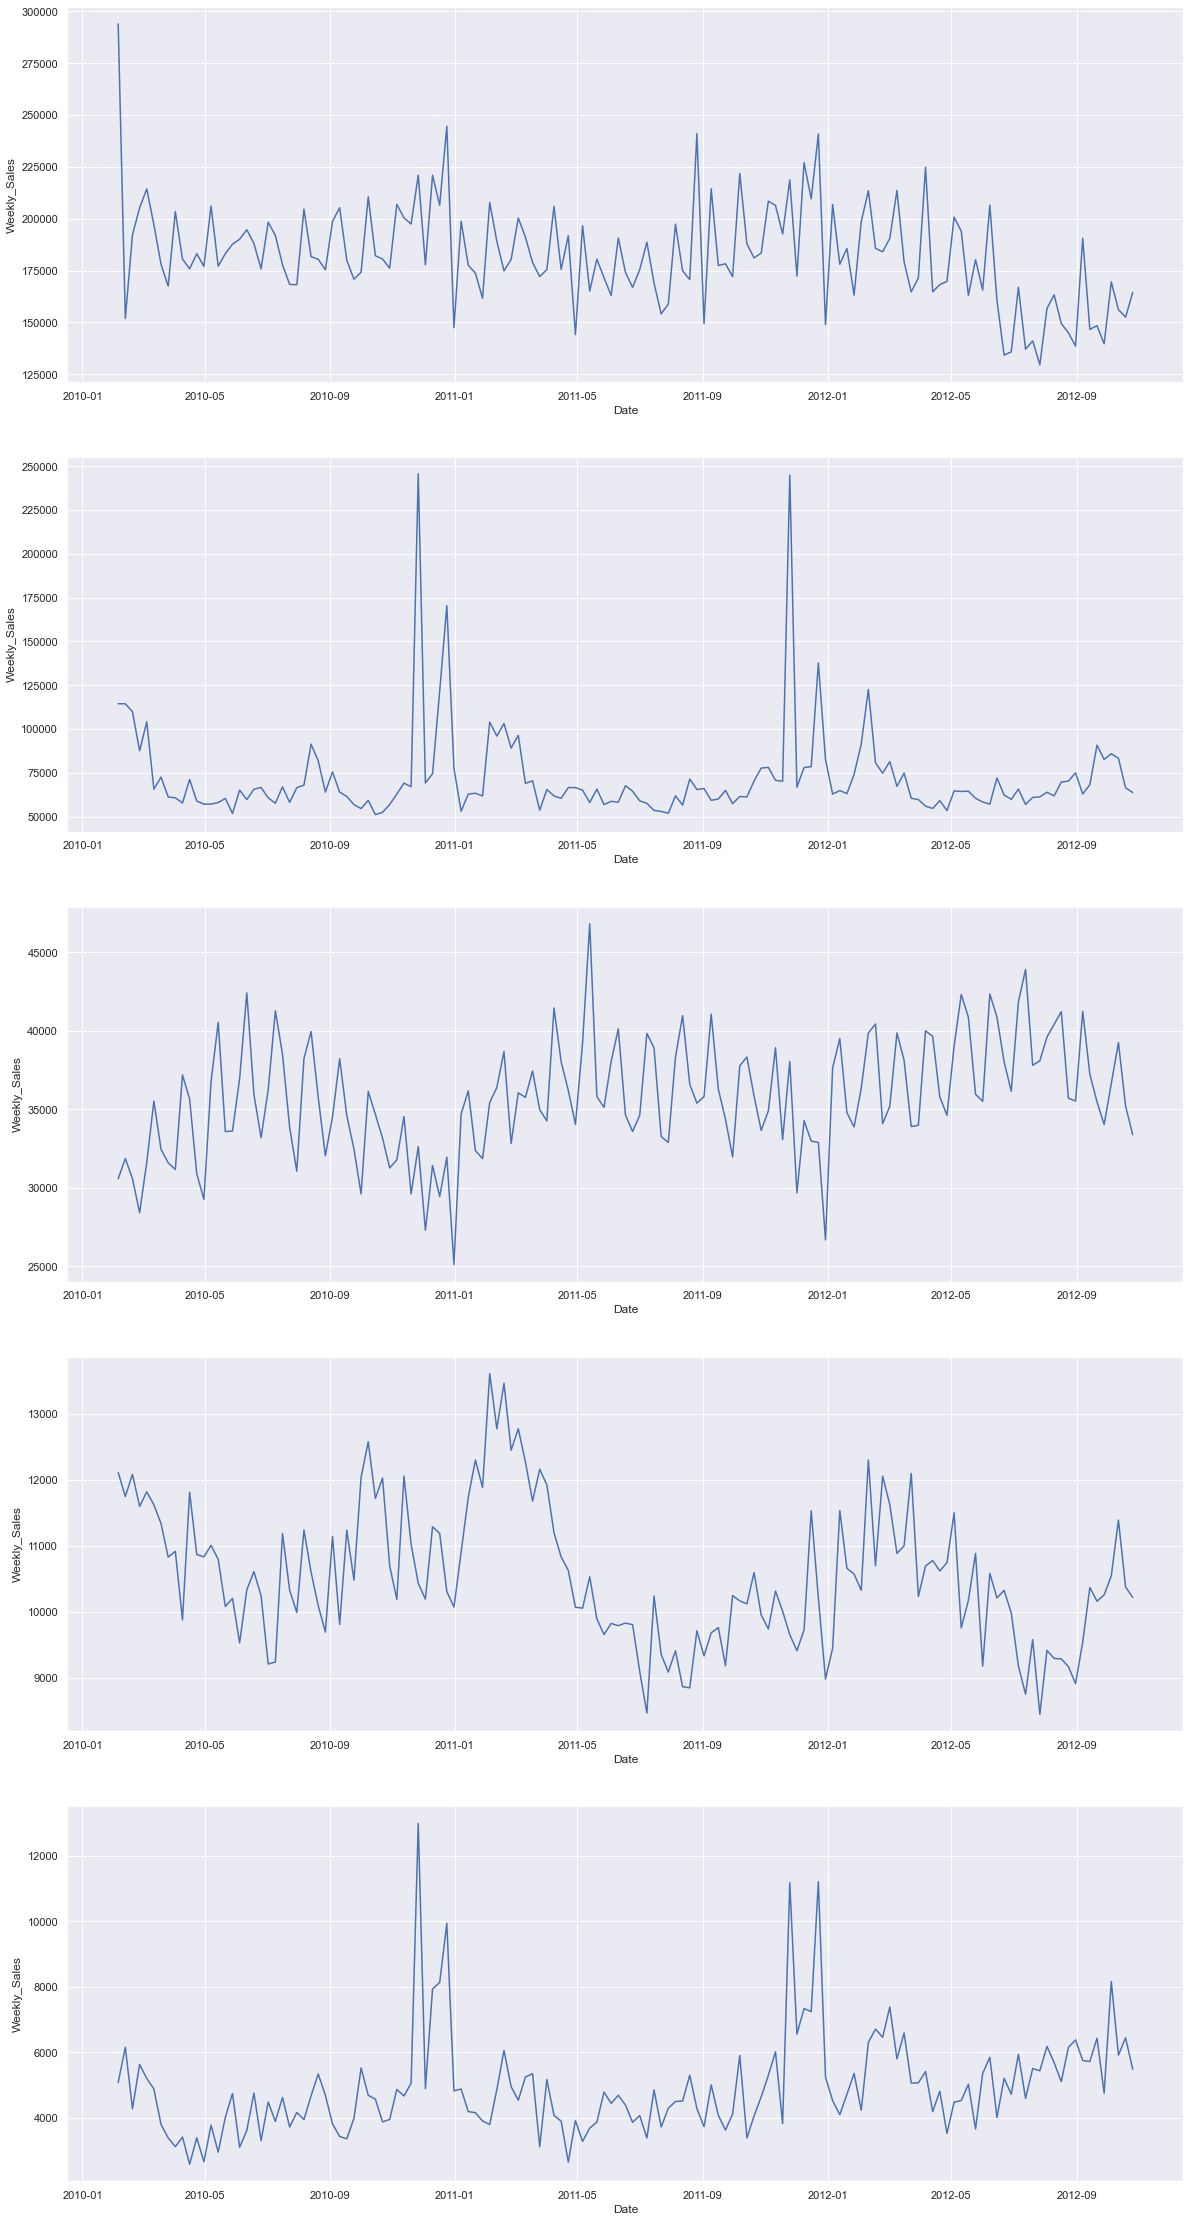

In [9]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(20, 40))
sns.lineplot(dataset_store_1.index, dataset_store_1["Weekly_Sales"], ax=ax1)
sns.lineplot(dataset_store_2.index, dataset_store_2["Weekly_Sales"], ax=ax2)
sns.lineplot(dataset_store_3.index, dataset_store_3["Weekly_Sales"], ax=ax3)
sns.lineplot(dataset_store_4.index, dataset_store_4["Weekly_Sales"], ax=ax4)
sns.lineplot(dataset_store_5.index, dataset_store_5["Weekly_Sales"], ax=ax5)

In [10]:
# По первому магазину наблюдаем некий нисходящий тренд и сезоннность - пики продаж в январе и сентябре. Также отметим, что в 2012 году есть еще дополнительные пики в апреле и июне, которых не было раньше. Также видим нисходящий тренд продаж
# По второму магазину видим ярко выраженную сезонность - пики продаж в декабре, январе и фервале. Тренд не выражен
# По третьему магазину также видим ярко выраженную сезонность - максимальные продажи в мае-июне, минимальные продажи в январе. В последний год скачки стали более плавными и равномерными. Тренд также особо не выражен, возможно есть незначительный рост
# По четвертому магазину картина немного запутанее. Но в целом мы также наблюдаем сезонность - пики  феврале-марте, спады - в июле-августе. Также есть нисходящий тренд
# По пятому магазину картина похожа на второй магазин. Наблюдаем сезонность - пики в ноябре-декабре. Тренд не выражен

In [11]:
dataset_store_1.index.freq = dataset_store_1.index.inferred_freq
dataset_store_2.index.freq = dataset_store_2.index.inferred_freq
dataset_store_3.index.freq = dataset_store_3.index.inferred_freq
dataset_store_4.index.freq = dataset_store_4.index.inferred_freq
dataset_store_5.index.freq = dataset_store_5.index.inferred_freq

# Forecasting - naive predictions

In [12]:
# Посмотрим графики trend, seasonal and residual по каждому магазину (аддитивный и мультипликативный метод)
import statsmodels.tsa.seasonal as statsmodels_seasonal
dataset_store_1_fin = dataset_store_1.drop(["Store", "Dept", "Store_Dept", "IsHoliday"], axis =  1)
dataset_store_1_fin
# Оставим только временные индексы и столбец с продажами

,Weekly_Sales
Date,
2010-02-05,293966.05
2010-02-12,151901.21
2010-02-19,192282.19
2010-02-26,205250.96
2010-03-05,214383.07
...,...
2012-09-28,139707.80
2012-10-05,169519.23
2012-10-12,156174.21


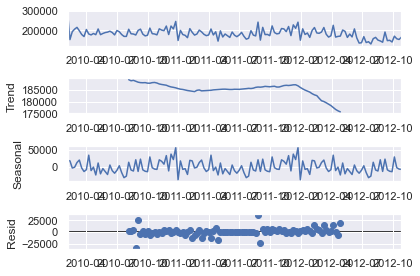

In [13]:
dataset_store_1_additive_decomposition = statsmodels_seasonal.seasonal_decompose(dataset_store_1_fin, model = "additive")
plot1_1 = dataset_store_1_additive_decomposition.plot()

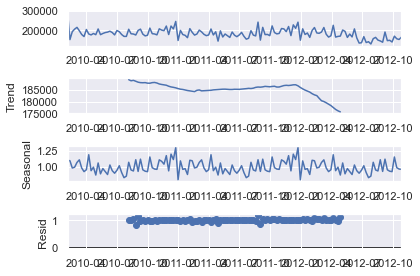

In [14]:
dataset_store_1_multiplicative_decomposition = statsmodels_seasonal.seasonal_decompose(dataset_store_1_fin, model = "multiplicative")
plot1_2 = dataset_store_1_multiplicative_decomposition.plot()

In [15]:
# Исходя из графиков по первому магазину наблюдаем нисходящий тренд и сезонность, шум распределен равномерно в течение года
# Посчитаем некоторые количественные характеристики по магазину 1
print(len(dataset_store_1_fin))
print(dataset_store_1_fin.index.min())
print(dataset_store_1_fin.index.max())
print(dataset_store_1_fin.index.freq)
# У нас недельная частота

143
2010-02-05 00:00:00
2012-10-26 00:00:00
<Week: weekday=4>


In [16]:
# Сделаем аналогичные манипуляции и с другими магазинами
# По statsmodels_seasonal выводы аналогичные, поэтому не будем дублировать графики. также мы наблюдаем и сезонность и тренд
# Количественные характеристики по другим магазинам также аналогичные
dataset_store_2_fin = dataset_store_2.drop(["Store", "Dept", "Store_Dept", "IsHoliday"], axis =  1)
dataset_store_3_fin = dataset_store_3.drop(["Store", "Dept", "Store_Dept", "IsHoliday"], axis =  1)
dataset_store_4_fin = dataset_store_4.drop(["Store", "Dept", "Store_Dept", "IsHoliday"], axis =  1)
dataset_store_5_fin = dataset_store_5.drop(["Store", "Dept", "Store_Dept", "IsHoliday"], axis =  1)

In [17]:
# Построим наивные предсказания, по последнему, среднему значению на последние 4 недели данных
forecast_horizon = 4

In [18]:
# Разобьем наш датасет на тренировочный и тестовый по всем магазинам
train_df_1 = dataset_store_1_fin.iloc[:-forecast_horizon]
test_df_1 = dataset_store_1_fin.iloc[-forecast_horizon:]

train_df_2 = dataset_store_2_fin.iloc[:-forecast_horizon]
test_df_2 = dataset_store_2_fin.iloc[-forecast_horizon:]

train_df_3 = dataset_store_3_fin.iloc[:-forecast_horizon]
test_df_3 = dataset_store_3_fin.iloc[-forecast_horizon:]

train_df_4 = dataset_store_4_fin.iloc[:-forecast_horizon]
test_df_4 = dataset_store_4_fin.iloc[-forecast_horizon:]

train_df_5 = dataset_store_5_fin.iloc[:-forecast_horizon]
test_df_5 = dataset_store_5_fin.iloc[-forecast_horizon:]

test_df_1
# Все верно, у нас в тестовом датасете данные за последние 4 недели.

,Weekly_Sales
Date,
2012-10-05,169519.23
2012-10-12,156174.21
2012-10-19,152511.55
2012-10-26,164464.02


In [19]:
train_df_1
# последнее значение - 139707.80 дол.

,Weekly_Sales
Date,
2010-02-05,293966.05
2010-02-12,151901.21
2010-02-19,192282.19
2010-02-26,205250.96
2010-03-05,214383.07
...,...
2012-08-31,138589.09
2012-09-07,190579.72
2012-09-14,146630.33


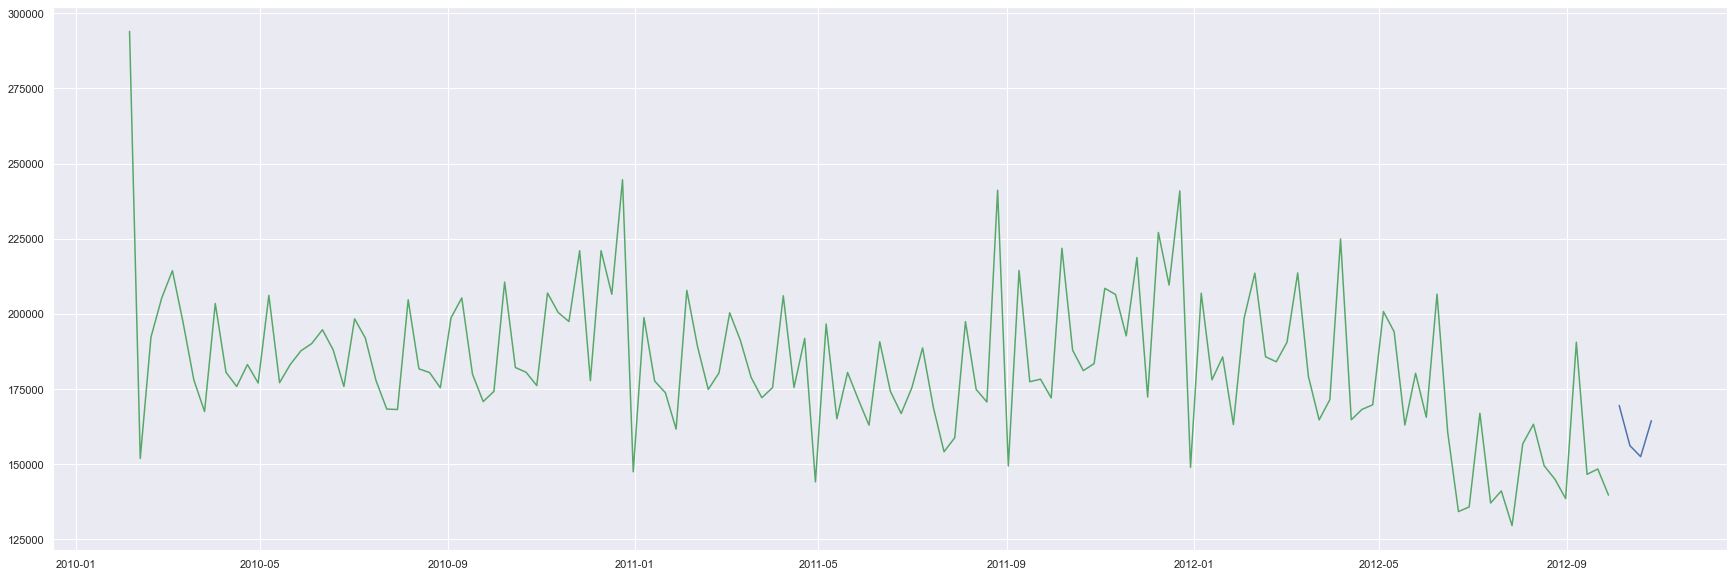

In [20]:
#Визуализируем наши образцы данных в разрезе тернировочного и тестового наборов
plt.figure(figsize=(30,10))

plt.plot(train_df_1.index, train_df_1["Weekly_Sales"], color = "g")
plt.plot(test_df_1.index, test_df_1["Weekly_Sales"], color = "b")

In [21]:
# Создадим функцию наивного предсказания по поcледнему значению для всех магазинов
def naive_prediction(train_df:pd.DataFrame, observations_to_predict:int, check_dataset:pd.DataFrame, **kwargs):
    last_value = train_df.iat[-1, 0]
    values = [last_value] * observations_to_predict
    
    start_date = train_df.index[-1] + pd.DateOffset(weeks=1)
    dates = pd.date_range(start=start_date, periods=observations_to_predict, freq=check_dataset.index.freq)
    return pd.DataFrame({"value": values}, index=dates)

naive_predictions_1 = naive_prediction(train_df_1, forecast_horizon, dataset_store_1_fin)
naive_predictions_2 = naive_prediction(train_df_2, forecast_horizon, dataset_store_2_fin)
naive_predictions_3 = naive_prediction(train_df_2, forecast_horizon, dataset_store_3_fin)
naive_predictions_4 = naive_prediction(train_df_2, forecast_horizon, dataset_store_4_fin)
naive_predictions_5 = naive_prediction(train_df_2, forecast_horizon, dataset_store_5_fin)

naive_predictions_1

,value
2012-10-05,139707.8
2012-10-12,139707.8
2012-10-19,139707.8
2012-10-26,139707.8


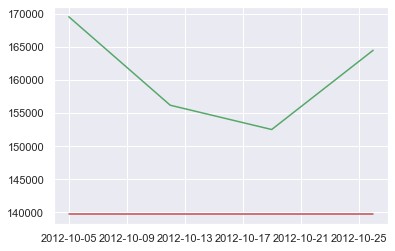

In [22]:
# Визуализируем предсказанные и реальные данные по магазину 1
plt.plot(test_df_1.index, test_df_1["Weekly_Sales"], color="g")
plt.plot(naive_predictions_1.index, naive_predictions_1["value"], color="r")
# по первому магазину видно, что если использовать как предсказ значение за последнюю неделю, то наши данные слишком занижены за следующие 4 недели
# ввиду другой сезонности они могут быть как и завышены так и посередине.

In [23]:
# Создадим функцию, которая посчитает нам характеристики MAPE и RMSE для предсказания продаж по магазинам
import sklearn.metrics as sk_metrics
import math

def calculate_errors(actual, predicted):
    errors = dict()
    errors["MAPE"] = sk_metrics.mean_absolute_percentage_error(actual, predicted)
    errors["RMSE"] = math.sqrt(sk_metrics.mean_squared_error(actual, predicted))
    return errors

# Посчитаем MAPE и RMSE для предсказаний по магазину 1
calculate_errors(test_df_1["Weekly_Sales"], naive_predictions_1["value"])

{'MAPE': 0.12894354460715632, 'RMSE': 22003.809100266604}

In [24]:
# Абсолютная ошибка по предсказанию продаж магазина 1 составляет 12.9%

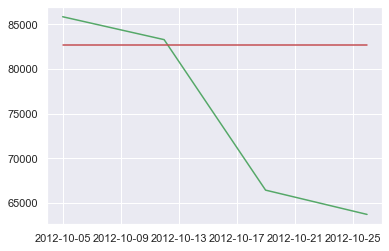

In [25]:
# Визуализируем предсказанные и реальные данные по магазину 2
plt.plot(test_df_2.index, test_df_2["Weekly_Sales"], color="g")
plt.plot(naive_predictions_2.index, naive_predictions_2["value"], color="r")

In [26]:
# Посчитаем MAPE и RMSE для предсказаний по магазину 2
calculate_errors(test_df_2["Weekly_Sales"], naive_predictions_2["value"])

{'MAPE': 0.14653617496434318, 'RMSE': 12562.932209896306}

In [27]:
# Абсолютная ошибка по предсказанию продаж магазина 2 составляет 14.7%

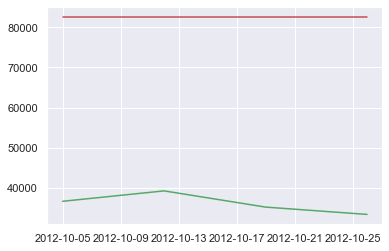

In [28]:
# Визуализируем предсказанные и реальные данные по магазину 3
plt.plot(test_df_3.index, test_df_3["Weekly_Sales"], color="g")
plt.plot(naive_predictions_3.index, naive_predictions_3["value"], color="r")

In [29]:
# Посчитаем MAPE и RMSE для предсказаний по магазину 3
calculate_errors(test_df_3["Weekly_Sales"], naive_predictions_3["value"])

{'MAPE': 1.2954156949372144, 'RMSE': 46561.03596375729}

In [30]:
# Абсолютная ошибка по предсказанию продаж магазина 3 составляет 129.5%
# Ошибка гораздо больше чем в предыдущих двух магазинах (почти в 10 раз). Причина - скачок & спад продаж из за сезонности.

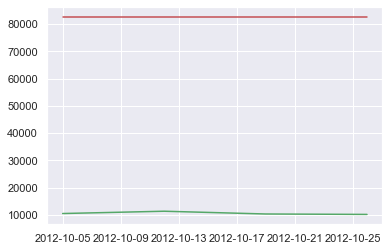

In [31]:
# Визуализируем предсказанные и реальные данные по магазину 4
plt.plot(test_df_4.index, test_df_4["Weekly_Sales"], color="g")
plt.plot(naive_predictions_4.index, naive_predictions_4["value"], color="r")

In [32]:
# Посчитаем MAPE и RMSE для предсказаний по магазину 4
calculate_errors(test_df_4["Weekly_Sales"], naive_predictions_4["value"])

{'MAPE': 6.787972335315661, 'RMSE': 72011.11050371255}

In [33]:
# Абсолютная ошибка по предсказанию продаж магазина 4 составляет 678.8%
# Ошибка невероятно огромна. Причина - скачок & спад продаж из за сезонности.

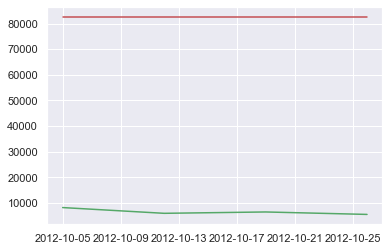

In [34]:
# Визуализируем предсказанные и реальные данные по магазину 5
plt.plot(test_df_5.index, test_df_5["Weekly_Sales"], color="g")
plt.plot(naive_predictions_5.index, naive_predictions_5["value"], color="r")

In [35]:
# Посчитаем MAPE и RMSE для предсказаний по магазину 5
calculate_errors(test_df_5["Weekly_Sales"], naive_predictions_5["value"])

{'MAPE': 11.989567202847423, 'RMSE': 76141.60175725669}

In [36]:
# Абсолютная ошибка по предсказанию продаж магазина 5 составляет 1198.9%
# Ошибка невероятно огромна. Причина - скачок & спад продаж из за сезонности.

In [37]:
# Общий вывод - Отметим закономерность, что чем больше продаж у магазина, чем он крупнее, тем меньше у нас ошибка. Чем магазин меньше, тем ошибка больше.
# Как видим у нас очень большой разброс ошибок - от 12.9% у магазина 1 до 1198.9% у магазина 5

In [38]:
# Теперь создадим функцию наивного предсказания по среднему значению для всех магазинов
def average_prediction(train_df:pd.DataFrame, observations_to_predict:int, check_dataset:pd.DataFrame, **kwargs):
    mean_value = train_df["Weekly_Sales"].mean()
    values = [mean_value] * observations_to_predict
    
    start_date = train_df.index[-1] + pd.DateOffset(weeks=1)
    dates = pd.date_range(start=start_date, periods=observations_to_predict, freq=check_dataset.index.freq)
    return pd.DataFrame({"value": values}, index=dates)

average_predictions_1 = average_prediction(train_df_1, forecast_horizon, dataset_store_1_fin)
average_predictions_2 = average_prediction(train_df_2, forecast_horizon, dataset_store_2_fin)
average_predictions_3 = average_prediction(train_df_2, forecast_horizon, dataset_store_3_fin)
average_predictions_4 = average_prediction(train_df_2, forecast_horizon, dataset_store_4_fin)
average_predictions_5 = average_prediction(train_df_2, forecast_horizon, dataset_store_5_fin)

average_predictions_1

,value
2012-10-05,183157.041007
2012-10-12,183157.041007
2012-10-19,183157.041007
2012-10-26,183157.041007


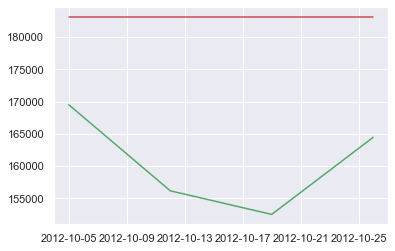

In [39]:
# Визуализируем предсказанные и реальные данные по магазину 1
plt.plot(test_df_1.index, test_df_1["Weekly_Sales"], color="g")
plt.plot(average_predictions_1.index, average_predictions_1["value"], color="r")

In [40]:
# Посчитаем MAPE и RMSE для предсказаний по магазину 1
calculate_errors(test_df_1["Weekly_Sales"], average_predictions_1["value"])

{'MAPE': 0.14195573131899838, 'RMSE': 23466.136301478055}

In [41]:
# Абсолютная ошибка по предсказанию продаж магазина 1 составляет 14.2% (больше чем в варианте с последним значением, но значения приблизительно в одном диапазоне)

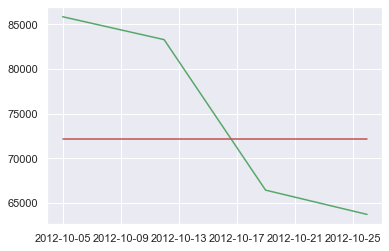

In [42]:
# Визуализируем предсказанные и реальные данные по магазину 2
plt.plot(test_df_2.index, test_df_2["Weekly_Sales"], color="g")
plt.plot(average_predictions_2.index, average_predictions_2["value"], color="r")

In [43]:
# Посчитаем MAPE и RMSE для предсказаний по магазину 2
calculate_errors(test_df_2["Weekly_Sales"], average_predictions_2["value"])

{'MAPE': 0.12797662375284832, 'RMSE': 10189.323396562068}

In [44]:
# Абсолютная ошибка по предсказанию продаж магазина 2 составляет 12.8% (меньше чем в варианте с последним значением, но значения приблизительно в одном диапазоне)

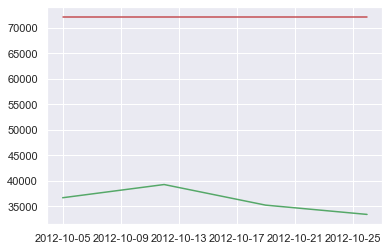

In [45]:
# Визуализируем предсказанные и реальные данные по магазину 3
plt.plot(test_df_3.index, test_df_3["Weekly_Sales"], color="g")
plt.plot(average_predictions_3.index, average_predictions_3["value"], color="r")

In [46]:
# Посчитаем MAPE и RMSE для предсказаний по магазину 3
calculate_errors(test_df_3["Weekly_Sales"], average_predictions_3["value"])

{'MAPE': 1.004689632569184, 'RMSE': 36108.65780336294}

In [47]:
# Абсолютная ошибка по предсказанию продаж магазина 3 составляет 100.5%. Ошибка меньше чем в варианте с последним значением
# Ошибка гораздо больше чем в предыдущих двух магазинах (почти в 10 раз). Причина - скачок & спад продаж из за сезонности.

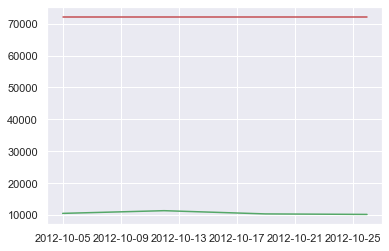

In [48]:
# Визуализируем предсказанные и реальные данные по магазину 4
plt.plot(test_df_4.index, test_df_4["Weekly_Sales"], color="g")
plt.plot(average_predictions_4.index, average_predictions_4["value"], color="r")

In [49]:
# Посчитаем MAPE и RMSE для предсказаний по магазину 4
calculate_errors(test_df_4["Weekly_Sales"], average_predictions_4["value"])

{'MAPE': 5.801586062941842, 'RMSE': 61544.657192436185}

In [50]:
# Абсолютная ошибка по предсказанию продаж магазина 4 составляет 580.2%, что меньше чем 678.8% в варианте с последним значением
# Но все равно ошибка невероятно огромна. Причина - скачок & спад продаж из за сезонности.

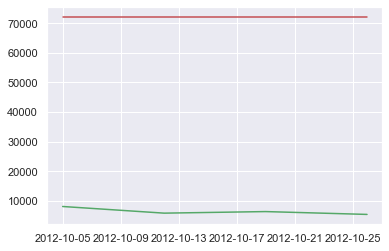

In [51]:
# Визуализируем предсказанные и реальные данные по магазину 5
plt.plot(test_df_5.index, test_df_5["Weekly_Sales"], color="g")
plt.plot(average_predictions_5.index, average_predictions_5["value"], color="r")

In [52]:
# Посчитаем MAPE и RMSE для предсказаний по магазину 5
calculate_errors(test_df_5["Weekly_Sales"], average_predictions_5["value"])

{'MAPE': 10.344372507578061, 'RMSE': 65675.98647844169}

In [53]:
# Абсолютная ошибка по предсказанию продаж магазина 5 составляет 1034.4%, что меньше чем 1198.9%
# Ошибка невероятно огромна. Причина - скачок & спад продаж из за сезонности.

In [54]:
# Общий вывод аналогичен выводу по предсказаниям по последним значениям. Чем крупнее магазин, тем меньше погрешность предсказания
# Также отметим что значения предсказаний в обеих подходах плюс минус одинаковы и не сильно отличаются друг от друга

# Forecasting with Cross Validation

In [55]:
# Создадим функцию для правильной кросс валидации наших данных
import sklearn.model_selection as sk_model_selection

def make_cv_splits(data_df, n_splits):
    time_series_cv_splits = sk_model_selection.TimeSeriesSplit(n_splits=n_splits)
    data_df_cv_splits_indices = time_series_cv_splits.split(data_df)
    
    data_df_cv_splits = []
    for train_indices, test_indices in data_df_cv_splits_indices:
        train, test = data_df.iloc[train_indices], data_df.iloc[test_indices]
        data_df_cv_splits.append((train, test))
        
        plt.figure()
        plt.plot(train.index, train["Weekly_Sales"], color="b")
        plt.plot(test.index, test["Weekly_Sales"], color="r")
    
    data_df_cv_splits.pop(0)
    return data_df_cv_splits

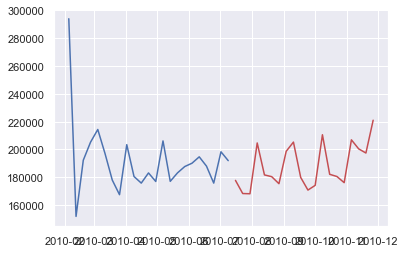

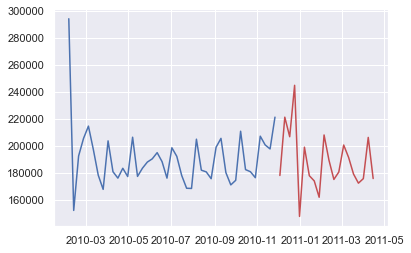

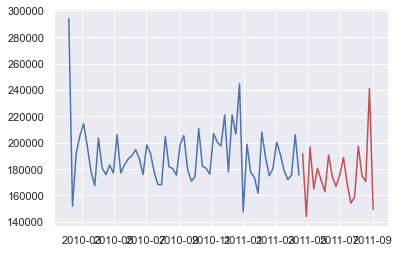

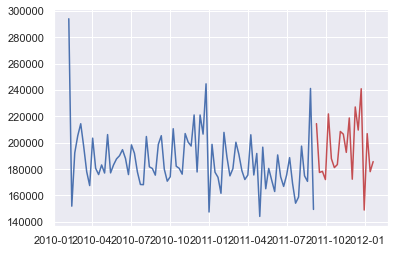

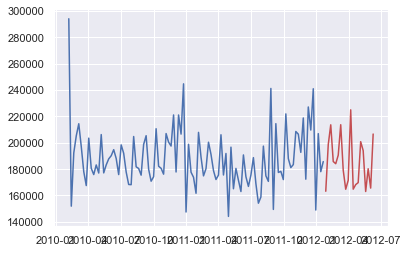

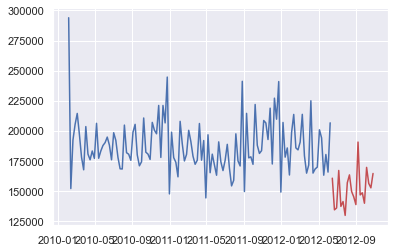

In [56]:
# Выполним кросс валидацию на 6 сплитах для 1 магазина
number_of_splits = 6
dataset_store_cv_splits_1 = make_cv_splits(dataset_store_1_fin, number_of_splits)

In [57]:
# Продублируем функцию make_cv_splits но без визуализации, чтобы сэкономить место output для графиков
def make_cv_splits2(data_df, n_splits):
    time_series_cv_splits = sk_model_selection.TimeSeriesSplit(n_splits=n_splits)
    data_df_cv_splits_indices = time_series_cv_splits.split(data_df)
    
    data_df_cv_splits = []
    for train_indices, test_indices in data_df_cv_splits_indices:
        train, test = data_df.iloc[train_indices], data_df.iloc[test_indices]
        data_df_cv_splits.append((train, test))
         
    data_df_cv_splits.pop(0)
    return data_df_cv_splits


dataset_store_cv_splits_2 = make_cv_splits2(dataset_store_2_fin, number_of_splits)
dataset_store_cv_splits_3 = make_cv_splits2(dataset_store_3_fin, number_of_splits)
dataset_store_cv_splits_4 = make_cv_splits2(dataset_store_4_fin, number_of_splits)
dataset_store_cv_splits_5 = make_cv_splits2(dataset_store_5_fin, number_of_splits)

In [58]:
# Создадим функцию, которая поможет нам расчитать занчение ошибок предсказаний в разрезе проведенной кросс валидации
def make_cv_prediction(cv_splits, model, **kwargs):
    predictions = []
    for train_df, test_df in cv_splits:
        predicted_df = model(train_df, len(test_df), **kwargs)
        predictions.append(predicted_df)
    return pd.concat(predictions)

In [59]:
test_data_1 = pd.concat([t for (_, t) in dataset_store_cv_splits_1])
test_data_2 = pd.concat([t for (_, t) in dataset_store_cv_splits_2])
test_data_3 = pd.concat([t for (_, t) in dataset_store_cv_splits_3])
test_data_4 = pd.concat([t for (_, t) in dataset_store_cv_splits_4])
test_data_5 = pd.concat([t for (_, t) in dataset_store_cv_splits_5])

In [60]:
# Немного изменим наши функции naive_prediction и average_prediction чтобы подвязать их через кросс валидацию
def naive_prediction_1store(train_df:pd.DataFrame, observations_to_predict:int, **kwargs):
    last_value = train_df.iat[-1, 0]
    values = [last_value] * observations_to_predict
    
    start_date = train_df.index[-1] + pd.DateOffset(weeks=1)
    dates = pd.date_range(start=start_date, periods=observations_to_predict, freq=dataset_store_1_fin.index.freq)
    return pd.DataFrame({"value": values}, index=dates)

def average_prediction_1store(train_df:pd.DataFrame, observations_to_predict:int, **kwargs):
    mean_value = train_df["Weekly_Sales"].mean()
    values = [mean_value] * observations_to_predict
    
    start_date = train_df.index[-1] + pd.DateOffset(weeks=1)
    dates = pd.date_range(start=start_date, periods=observations_to_predict, freq=dataset_store_1_fin.index.freq)
    return pd.DataFrame({"value": values}, index=dates)

In [61]:
naive_predictions_split_1 = make_cv_prediction(dataset_store_cv_splits_1, naive_prediction_1store)
naive_errors_1 = calculate_errors(test_data_1, naive_predictions_split_1)
print("Naive errors 1 store:", naive_errors_1)

average_predictions_split_1 = make_cv_prediction(dataset_store_cv_splits_1, average_prediction_1store)
average_errors_1 = calculate_errors(test_data_1, average_predictions_split_1)
print("Average errors 1 store:", average_errors_1)

Naive errors 1 store: {'MAPE': 0.19504443245524158, 'RMSE': 40608.12710293696}
Average errors 1 store: {'MAPE': 0.13061920130305135, 'RMSE': 26686.962964955335}


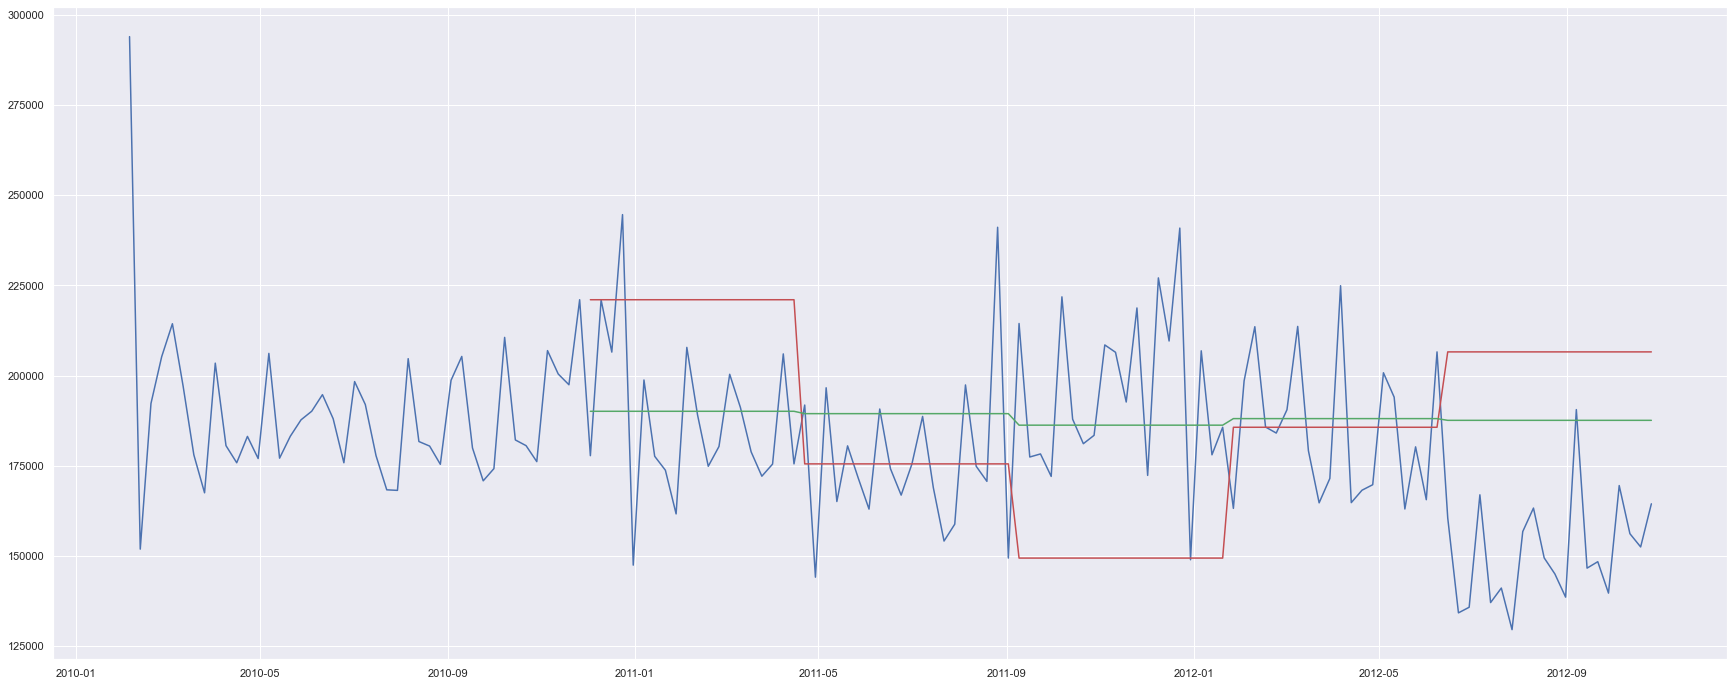

In [62]:
# Итого по 1 магазину через кросс валидацию навиные предсказания по последнему значению  у нас с ошибкой 19.5%, по среднему значению с ошибкой 13.1% 
# Визуализируем
plt.figure(figsize=(30, 12))
plt.plot(dataset_store_1_fin.index, dataset_store_1_fin["Weekly_Sales"])
plt.plot(naive_predictions_split_1.index, naive_predictions_split_1["value"], color = "r")
plt.plot(average_predictions_split_1.index, average_predictions_split_1["value"], color = "g")

In [63]:
# также можно построить аналогичные кросс валидированные навиные предсказания по другим магазинам, но ввиду очень невысокой точности и логичности таких предсказаний, я предлагаю с целью экономии кода перейти сразу на более точные модели, в которых мы пройдемся как раз по другим магазинам (например SARIMAX)
# это будет более эффективно и логично

# Forecasting with SARIMAX

In [64]:
import statsmodels.tsa.statespace.sarimax as statsmodels_sarimax

# Сделаем все необходимые манипуляции по аналогии с naive_prediction и average_prediction ДЛЯ 1 МАГАЗИНА
def sarima_prediction_1store(train_df:pd.DataFrame, observations_to_predict:int, **kwargs):
    sarima_model = statsmodels_sarimax.SARIMAX(train_df, order=kwargs["order"], seasonal_order=kwargs["seasonal_order"])
    sarima_model_fit =sarima_model.fit(disp=False)
    values = sarima_model_fit.forecast(observations_to_predict)
    
    start_date = train_df.index[-1] + pd.DateOffset(weeks=1)
    dates = pd.date_range(start=start_date, periods=observations_to_predict, freq=dataset_store_1_fin.index.freq)
    
    return pd.DataFrame({"value": values}, index=dates)

C:\Users\93ttt\anaconda3\envs\env3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\93ttt\anaconda3\envs\env3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA errors: {'MAPE': 0.18185992237840182, 'RMSE': 37965.78132880879}


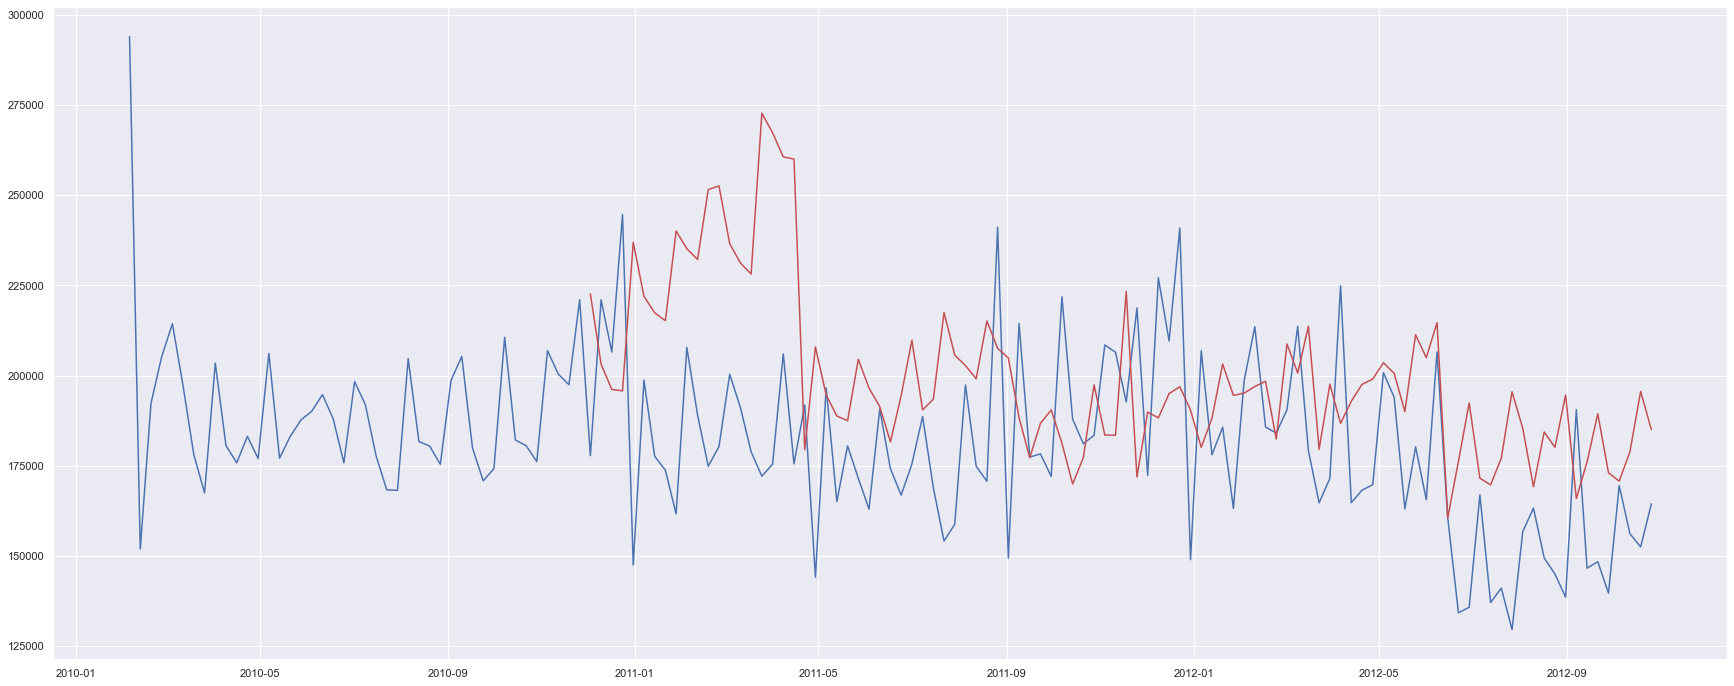

In [65]:
sarima_order_kwargs = {"order": (1, 1, 1), "seasonal_order": (1, 1, 1, 12)}
sarima_predictions_store_1 = make_cv_prediction(dataset_store_cv_splits_1, sarima_prediction_1store, **sarima_order_kwargs)
sarima_errors = calculate_errors(test_data_1, sarima_predictions_store_1)
print("SARIMA errors:", sarima_errors)

plt.figure(figsize=(30, 12))
plt.plot(dataset_store_1_fin.index, dataset_store_1_fin["Weekly_Sales"])
plt.plot(sarima_predictions_store_1.index, sarima_predictions_store_1["value"], color = "r")

In [66]:
# Итого ошибка предсказаний у 1 магазина по модели SARIMAX у нас получилась около 18%, что довольно много (также предварительно поигрался с гипперпараметрами, но по умолчанию с единичками, ошибка меньше всего вышла)

In [67]:
# Сделаем все необходимые манипуляции по аналогии с naive_prediction и average_prediction ДЛЯ 2 МАГАЗИНА
def sarima_prediction_2store(train_df:pd.DataFrame, observations_to_predict:int, **kwargs):
    sarima_model = statsmodels_sarimax.SARIMAX(train_df, order=kwargs["order"], seasonal_order=kwargs["seasonal_order"])
    sarima_model_fit =sarima_model.fit(disp=False)
    values = sarima_model_fit.forecast(observations_to_predict)
    
    start_date = train_df.index[-1] + pd.DateOffset(weeks=1)
    dates = pd.date_range(start=start_date, periods=observations_to_predict, freq=dataset_store_2_fin.index.freq)
    
    return pd.DataFrame({"value": values}, index=dates)

C:\Users\93ttt\anaconda3\envs\env3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA errors: {'MAPE': 0.2832395394047546, 'RMSE': 35475.84866322234}


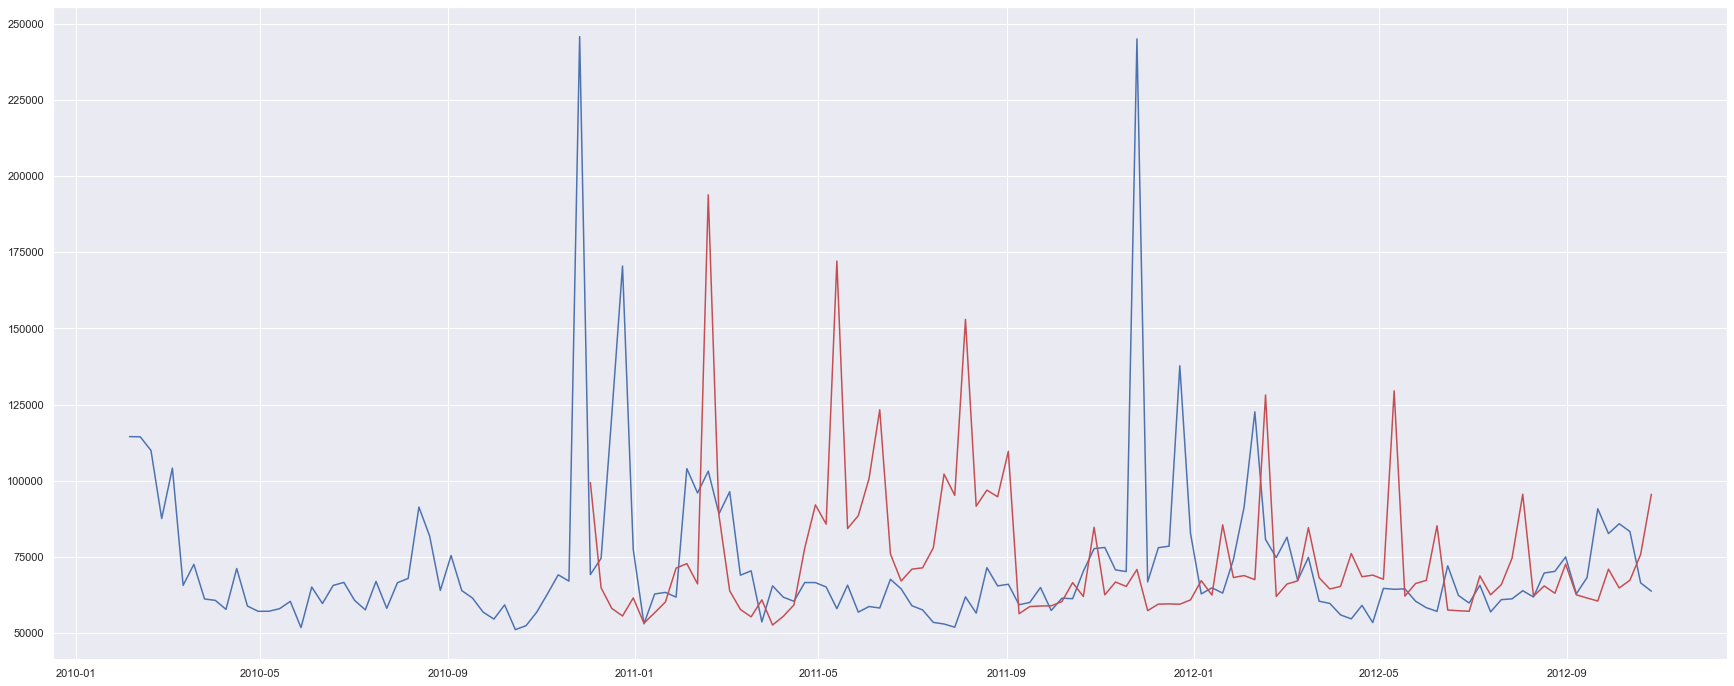

In [68]:
sarima_order_kwargs = {"order": (1, 0, 1), "seasonal_order": (1, 1, 1, 12)}
sarima_predictions_store_2 = make_cv_prediction(dataset_store_cv_splits_2, sarima_prediction_2store, **sarima_order_kwargs)
sarima_errors = calculate_errors(test_data_2, sarima_predictions_store_2)
print("SARIMA errors:", sarima_errors)

plt.figure(figsize=(30, 12))
plt.plot(dataset_store_2_fin.index, dataset_store_2_fin["Weekly_Sales"])
plt.plot(sarima_predictions_store_2.index, sarima_predictions_store_2["value"], color = "r")

In [69]:
# Итого ошибка предсказаний у 2 магазина по модели SARIMAX у нас получилась около 28%. Это очень много.
# Также отметим что при гипперапарметрах "order": (1, 0, 1) ошибка оптимальна. По умолчанию при "order": (1, 0, 1) ошибка составила около 80%, что в 3 раза больше

In [70]:
# Сделаем все необходимые манипуляции по аналогии с naive_prediction и average_prediction ДЛЯ 3 МАГАЗИНА
def sarima_prediction_3store(train_df:pd.DataFrame, observations_to_predict:int, **kwargs):
    sarima_model = statsmodels_sarimax.SARIMAX(train_df, order=kwargs["order"], seasonal_order=kwargs["seasonal_order"])
    sarima_model_fit =sarima_model.fit(disp=False)
    values = sarima_model_fit.forecast(observations_to_predict)
    
    start_date = train_df.index[-1] + pd.DateOffset(weeks=1)
    dates = pd.date_range(start=start_date, periods=observations_to_predict, freq=dataset_store_3_fin.index.freq)
    
    return pd.DataFrame({"value": values}, index=dates)

C:\Users\93ttt\anaconda3\envs\env3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA errors: {'MAPE': 0.11130935136774582, 'RMSE': 4923.67539164712}


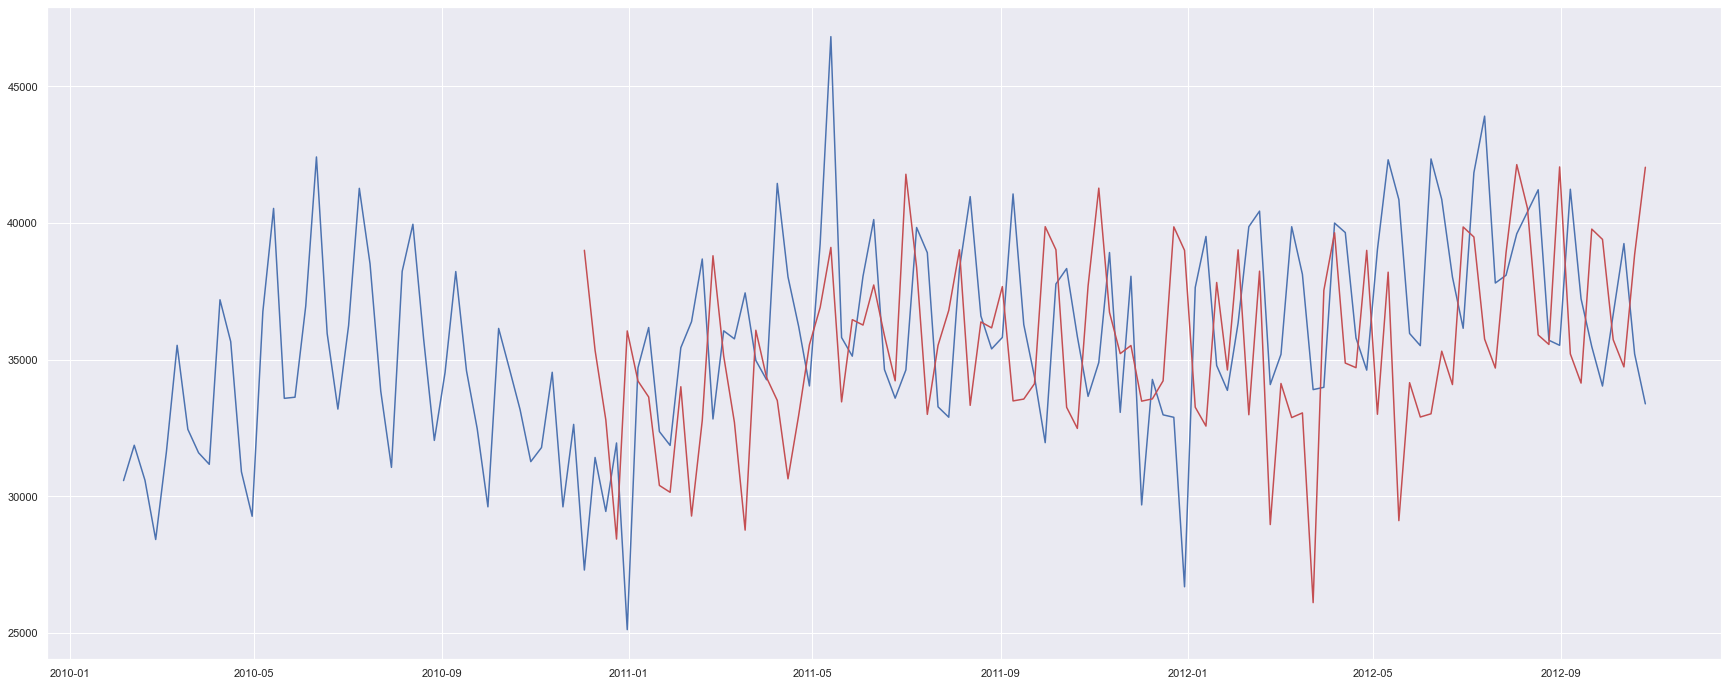

In [71]:
sarima_order_kwargs = {"order": (0, 0, 1), "seasonal_order": (1, 1, 1, 12)}
sarima_predictions_store_3 = make_cv_prediction(dataset_store_cv_splits_3, sarima_prediction_3store, **sarima_order_kwargs)
sarima_errors = calculate_errors(test_data_3, sarima_predictions_store_3)
print("SARIMA errors:", sarima_errors)

plt.figure(figsize=(30, 12))
plt.plot(dataset_store_3_fin.index, dataset_store_3_fin["Weekly_Sales"])
plt.plot(sarima_predictions_store_3.index, sarima_predictions_store_3["value"], color = "r")

In [72]:
# Итого ошибка предсказаний у 3 магазина по модели SARIMAX у нас получилась около 11%, что гораздо лучше чем в наивных и средних предсказаниях ранее
# Оптимальные гипперпараметры {"order": (0, 0, 1), "seasonal_order": (1, 1, 1, 12)}

In [73]:
# Сделаем все необходимые манипуляции по аналогии с naive_prediction и average_prediction ДЛЯ 4 МАГАЗИНА
def sarima_prediction_4store(train_df:pd.DataFrame, observations_to_predict:int, **kwargs):
    sarima_model = statsmodels_sarimax.SARIMAX(train_df, order=kwargs["order"], seasonal_order=kwargs["seasonal_order"])
    sarima_model_fit =sarima_model.fit(disp=False)
    values = sarima_model_fit.forecast(observations_to_predict)
    
    start_date = train_df.index[-1] + pd.DateOffset(weeks=1)
    dates = pd.date_range(start=start_date, periods=observations_to_predict, freq=dataset_store_4_fin.index.freq)
    
    return pd.DataFrame({"value": values}, index=dates)

C:\Users\93ttt\anaconda3\envs\env3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA errors: {'MAPE': 0.08593701042140092, 'RMSE': 1080.3170391368924}


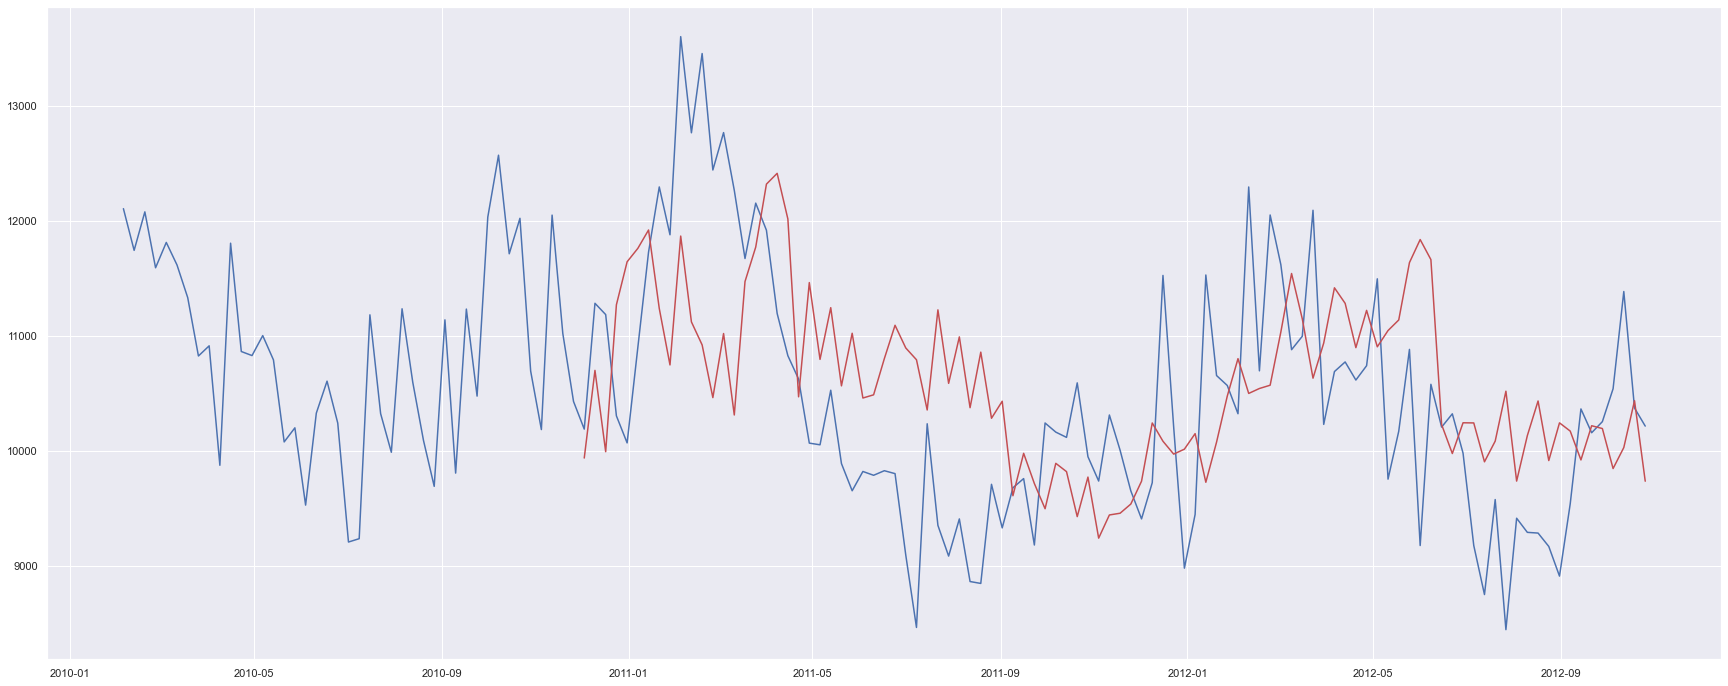

In [74]:
sarima_order_kwargs = {"order": (1, 1, 0), "seasonal_order": (1, 1, 1, 12)}
sarima_predictions_store_4 = make_cv_prediction(dataset_store_cv_splits_4, sarima_prediction_4store, **sarima_order_kwargs)
sarima_errors = calculate_errors(test_data_4, sarima_predictions_store_4)
print("SARIMA errors:", sarima_errors)

plt.figure(figsize=(30, 12))
plt.plot(dataset_store_4_fin.index, dataset_store_4_fin["Weekly_Sales"])
plt.plot(sarima_predictions_store_4.index, sarima_predictions_store_4["value"], color = "r")

In [75]:
# Итого ошибка предсказаний у 4 магазина по модели SARIMAX у нас получилась около 8.6%, что гораздо лучше чем в наивных и средних предсказаниях ранее. Очень неплохой результат
# Оптимальные гипперпараметры {"order": (1, 1, 0), "seasonal_order": (1, 1, 1, 12)}

In [76]:
# Сделаем все необходимые манипуляции по аналогии с naive_prediction и average_prediction ДЛЯ 5 МАГАЗИНА
def sarima_prediction_5store(train_df:pd.DataFrame, observations_to_predict:int, **kwargs):
    sarima_model = statsmodels_sarimax.SARIMAX(train_df, order=kwargs["order"], seasonal_order=kwargs["seasonal_order"])
    sarima_model_fit =sarima_model.fit(disp=False)
    values = sarima_model_fit.forecast(observations_to_predict)
    
    start_date = train_df.index[-1] + pd.DateOffset(weeks=1)
    dates = pd.date_range(start=start_date, periods=observations_to_predict, freq=dataset_store_5_fin.index.freq)
    
    return pd.DataFrame({"value": values}, index=dates)

C:\Users\93ttt\anaconda3\envs\env3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA errors: {'MAPE': 0.20782332635268141, 'RMSE': 1854.2872614244534}


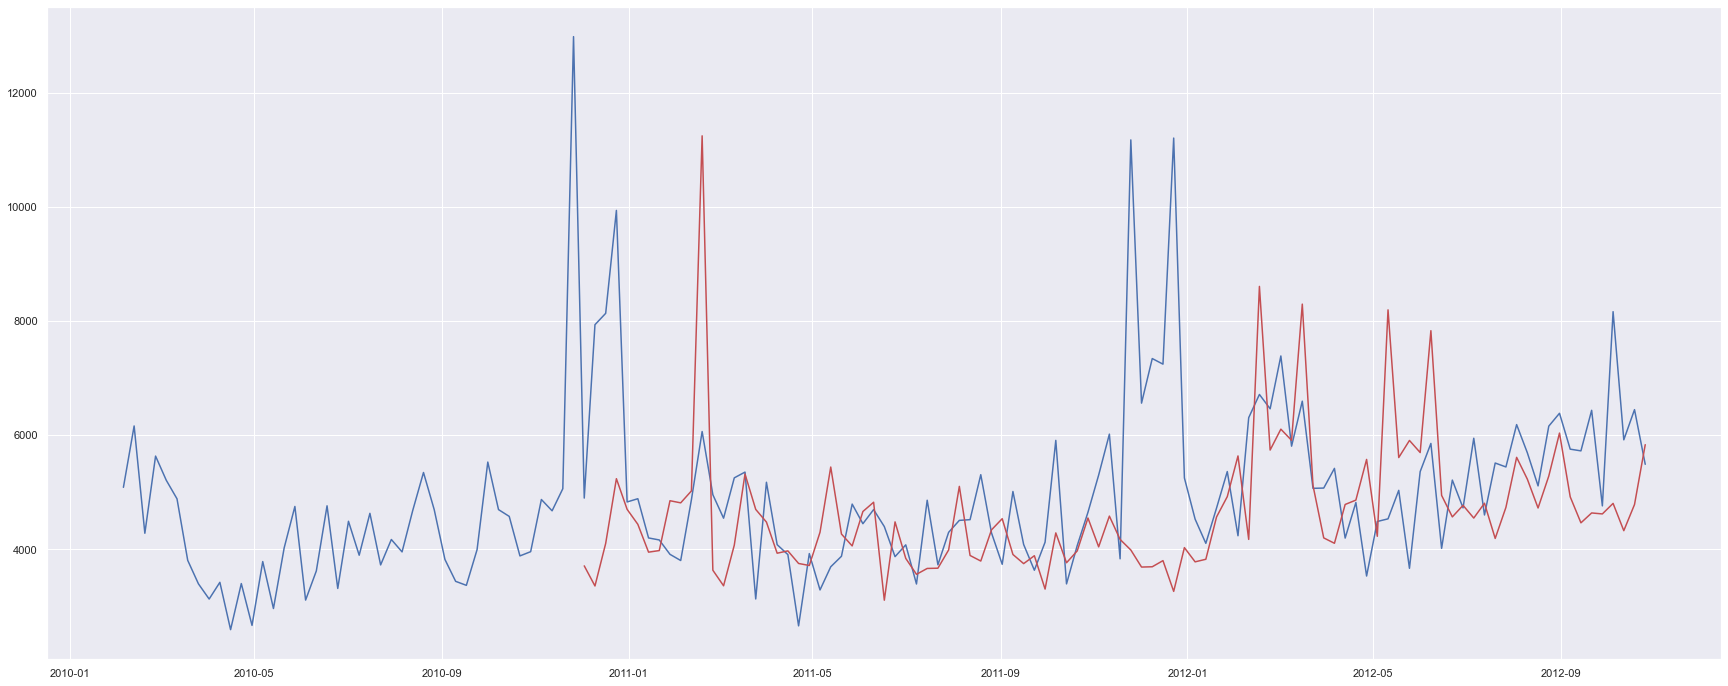

In [77]:
sarima_order_kwargs = {"order": (0, 0, 0), "seasonal_order": (1, 1, 1, 12)}
sarima_predictions_store_5 = make_cv_prediction(dataset_store_cv_splits_5, sarima_prediction_5store, **sarima_order_kwargs)
sarima_errors = calculate_errors(test_data_5, sarima_predictions_store_5)
print("SARIMA errors:", sarima_errors)

plt.figure(figsize=(30, 12))
plt.plot(dataset_store_5_fin.index, dataset_store_5_fin["Weekly_Sales"])
plt.plot(sarima_predictions_store_5.index, sarima_predictions_store_5["value"], color = "r")

In [78]:
# Итого ошибка предсказаний у 5 магазина по модели SARIMAX у нас получилась около 21%, что гораздо лучше чем в наивных и средних предсказаниях ранее, хотя все равно ошибка большая
# Оптимальные гипперпараметры {"order": (0, 0, 0), "seasonal_order": (1, 1, 1, 12)}

# Forecasting with Prophet

In [79]:
from fbprophet import Prophet

m_1 = Prophet(yearly_seasonality = True)
m_1.fit(train_df_1.reset_index().rename({"Date": "ds", "Weekly_Sales": "y"}, axis = 1))

Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [80]:
future_1 = m_1.make_future_dataframe(periods=forecast_horizon)
forecast_1 = m_1.predict(future_1)
forecast_1 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,195589.508075,183681.508220,235546.918588,195589.508075,195589.508075,15060.835941,15060.835941,15060.835941,15060.835941,15060.835941,15060.835941,0.0,0.0,0.0,210650.344016
1,2010-02-12,195436.184250,178125.295338,229155.652052,195436.184250,195436.184250,8287.422413,8287.422413,8287.422413,8287.422413,8287.422413,8287.422413,0.0,0.0,0.0,203723.606663
2,2010-02-19,195282.860426,173533.882779,225038.567646,195282.860426,195282.860426,3599.905975,3599.905975,3599.905975,3599.905975,3599.905975,3599.905975,0.0,0.0,0.0,198882.766401
3,2010-02-26,195129.536602,175999.779748,227288.382825,195129.536602,195129.536602,5465.787551,5465.787551,5465.787551,5465.787551,5465.787551,5465.787551,0.0,0.0,0.0,200595.324153
4,2010-03-05,194976.212777,177575.622498,227097.153543,194976.212777,194976.212777,8476.696309,8476.696309,8476.696309,8476.696309,8476.696309,8476.696309,0.0,0.0,0.0,203452.909086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2012-09-28,170562.980596,140530.763104,190523.118319,170562.980596,170562.980596,-6298.088939,-6298.088939,-6298.088939,-6298.088939,-6298.088939,-6298.088939,0.0,0.0,0.0,164264.891657
139,2012-09-29,170528.024787,139243.663628,192871.396719,170528.024787,170528.024787,-5251.666388,-5251.666388,-5251.666388,-5251.666388,-5251.666388,-5251.666388,0.0,0.0,0.0,165276.358399
140,2012-09-30,170493.068978,139089.790985,190126.471769,170493.068978,170493.068978,-4186.187304,-4186.187304,-4186.187304,-4186.187304,-4186.187304,-4186.187304,0.0,0.0,0.0,166306.881674
141,2012-10-01,170458.113170,141065.618208,192278.488154,170458.113170,170458.113170,-3126.326466,-3126.326466,-3126.326466,-3126.326466,-3126.326466,-3126.326466,0.0,0.0,0.0,167331.786704


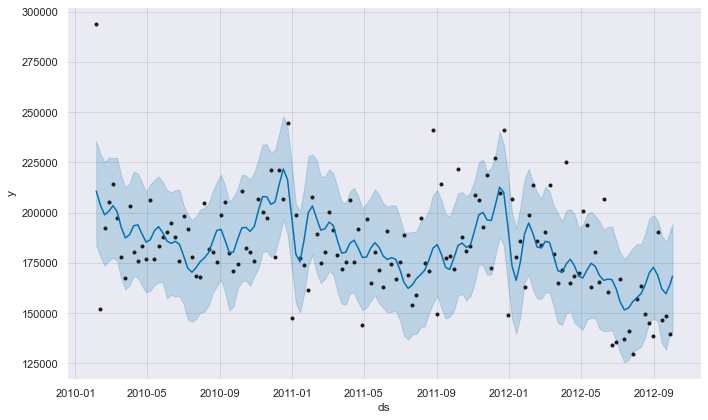

In [81]:
fig1_1 = m_1.plot(forecast_1)

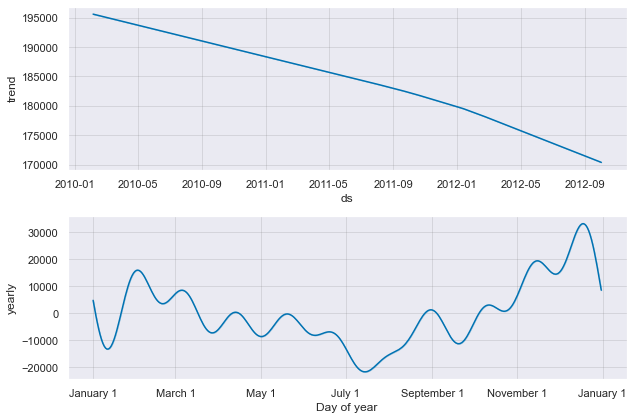

In [82]:
fig1_2 = m_1.plot_components(forecast_1)

In [83]:
# Судя по точкам проедсказаний из графика выше, алгоритм работает достаточно неплохо, хотя и с некоторыми погрешностями

In [84]:
# Выполним аналогичный предсказ, только на других магазинах, например 3 и 5
m_3 = Prophet(yearly_seasonality = True)
m_3.fit(train_df_3.reset_index().rename({"Date": "ds", "Weekly_Sales": "y"}, axis = 1))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [85]:
future_3 = m_3.make_future_dataframe(periods=forecast_horizon)
forecast_3 = m_3.predict(future_1)
forecast_3 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,32959.194457,28815.044797,36103.768780,32959.194457,32959.194457,-527.630438,-527.630438,-527.630438,-527.630438,-527.630438,-527.630438,0.0,0.0,0.0,32431.564018
1,2010-02-12,32995.281527,29394.378299,36596.450140,32995.281527,32995.281527,-37.397142,-37.397142,-37.397142,-37.397142,-37.397142,-37.397142,0.0,0.0,0.0,32957.884386
2,2010-02-19,33031.368598,29421.610958,36780.337198,33031.368598,33031.368598,187.709298,187.709298,187.709298,187.709298,187.709298,187.709298,0.0,0.0,0.0,33219.077896
3,2010-02-26,33067.455669,29167.254986,36677.612592,33067.455669,33067.455669,-57.854644,-57.854644,-57.854644,-57.854644,-57.854644,-57.854644,0.0,0.0,0.0,33009.601024
4,2010-03-05,33103.542739,29006.752584,36126.107429,33103.542739,33103.542739,-454.739073,-454.739073,-454.739073,-454.739073,-454.739073,-454.739073,0.0,0.0,0.0,32648.803666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2012-09-28,37931.588291,32944.225420,40082.113561,37931.588291,37931.588291,-1481.743600,-1481.743600,-1481.743600,-1481.743600,-1481.743600,-1481.743600,0.0,0.0,0.0,36449.844691
139,2012-09-29,37936.729170,33112.068046,40088.288495,37936.729170,37936.729170,-1507.201035,-1507.201035,-1507.201035,-1507.201035,-1507.201035,-1507.201035,0.0,0.0,0.0,36429.528135
140,2012-09-30,37941.870049,32902.648505,40116.102624,37941.870049,37941.870049,-1516.933464,-1516.933464,-1516.933464,-1516.933464,-1516.933464,-1516.933464,0.0,0.0,0.0,36424.936585
141,2012-10-01,37947.010928,32951.241268,40194.554776,37947.010928,37947.010928,-1510.796297,-1510.796297,-1510.796297,-1510.796297,-1510.796297,-1510.796297,0.0,0.0,0.0,36436.214631


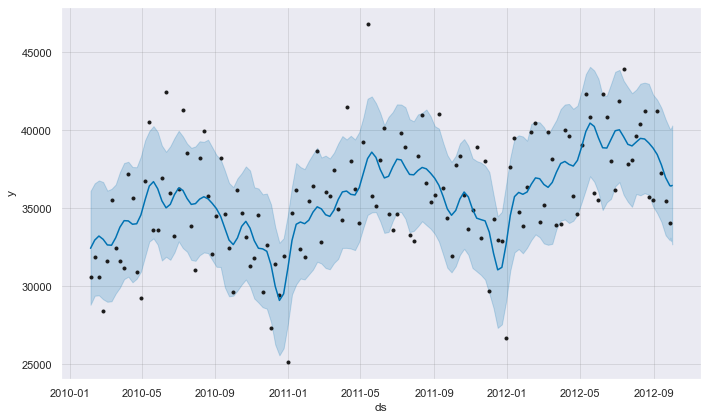

In [86]:
fig3_1 = m_3.plot(forecast_3)

In [87]:
m_5 = Prophet(yearly_seasonality = True)
m_5.fit(train_df_5.reset_index().rename({"Date": "ds", "Weekly_Sales": "y"}, axis = 1))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [88]:
future_5 = m_5.make_future_dataframe(periods=forecast_horizon)
forecast_5 = m_5.predict(future_5)
forecast_5

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-02-05,4307.286704,3294.856335,5892.524042,4307.286704,4307.286704,268.140871,268.140871,268.140871,268.140871,268.140871,268.140871,0.0,0.0,0.0,4575.427576
1,2010-02-12,4316.388079,3712.048116,6302.930451,4316.388079,4316.388079,703.336575,703.336575,703.336575,703.336575,703.336575,703.336575,0.0,0.0,0.0,5019.724655
2,2010-02-19,4325.489454,3929.876988,6516.127956,4325.489454,4325.489454,871.879444,871.879444,871.879444,871.879444,871.879444,871.879444,0.0,0.0,0.0,5197.368898
3,2010-02-26,4334.590829,3962.895475,6412.052437,4334.590829,4334.590829,899.275431,899.275431,899.275431,899.275431,899.275431,899.275431,0.0,0.0,0.0,5233.866260
4,2010-03-05,4343.692204,3943.880623,6446.164331,4343.692204,4343.692204,784.823585,784.823585,784.823585,784.823585,784.823585,784.823585,0.0,0.0,0.0,5128.515789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2012-09-28,5838.107096,4218.712074,6913.738661,5838.107096,5838.107096,-313.852810,-313.852810,-313.852810,-313.852810,-313.852810,-313.852810,0.0,0.0,0.0,5524.254286
139,2012-09-29,5840.033919,4489.140715,6914.786770,5840.033919,5840.033919,-256.553560,-256.553560,-256.553560,-256.553560,-256.553560,-256.553560,0.0,0.0,0.0,5583.480359
140,2012-09-30,5841.960743,4314.740228,6914.843081,5841.960743,5841.960743,-203.044522,-203.044522,-203.044522,-203.044522,-203.044522,-203.044522,0.0,0.0,0.0,5638.916221
141,2012-10-01,5843.887566,4329.049004,6969.143161,5843.887566,5843.887566,-154.758837,-154.758837,-154.758837,-154.758837,-154.758837,-154.758837,0.0,0.0,0.0,5689.128730


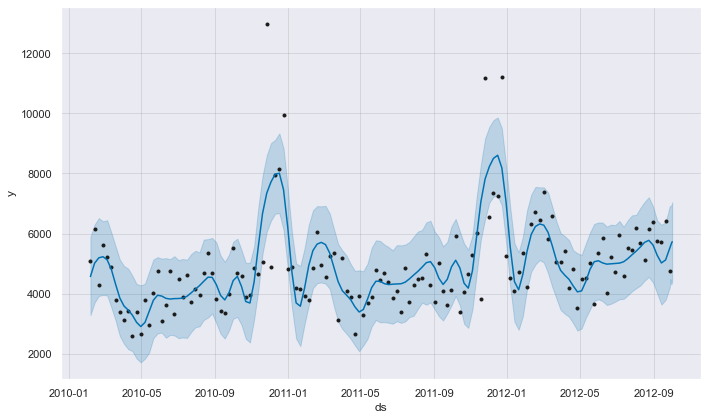

In [89]:
fig5_1 = m_5.plot(forecast_5)

In [90]:
# Визуализации очень похожи независимо от выбранного магазина. Библиотека Prophet выглядит весьма неплохо